In [6]:

#!/usr/bin/python3

# Getting all the Required Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import GradientBoostingRegressor
import joblib
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error



# Getting the Dataset into the Program
original = pd.read_csv('dataset.csv')

'''
Since the Dataset has many Null Values in the 'Volumes' Column.
Null Values will be predicted taking Target Variable as a Feature.
Volumes Prediction (Column with Null Values)
'''

# Dataset Used is the Raw Dataset
df_train = original.copy()

# Normalizing Outliser using Z-Score
df_train['lsg_4'] = (df_train['lsg_4'] - df_train['lsg_4'].mean()) / df_train['lsg_4'].std()
df_train['lsg_4'] = np.c_[np.ones(df_train['lsg_4'].shape[0]), df_train['lsg_4']] 

# Identifing Features and Target Variable
features = ['price', 'gift_type', 'gift_category', 'gift_cluster', 'lsg_1', 'lsg_2', 'lsg_3','lsg_4', 'lsg_5', 'lsg_6', 'is_discounted']
target = 'volumes'

# Slicing the Data Frame to create Model
m = df_train[['volumes', 'price', 'gift_type', 'gift_category', 'gift_cluster', 'lsg_1', 'lsg_2', 'lsg_3','lsg_4', 'lsg_5', 'lsg_6', 'is_discounted']]
d = m.dropna()

# Data to Train the Model
X = d.drop(columns = [target], axis = 1)
Y = d[target]

# Splitting the Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

# Creating the Model (Optimised)
model = GradientBoostingRegressor(n_estimators = 120 , random_state = 2 , learning_rate = 0.378 , max_depth = 5)
model.fit(X_train,Y_train)

# Dividing the Dataframe to Impute predicted Null Values
df_train = original.copy()
test  = pd.DataFrame(df_train[df_train[target].isnull()])
df_train.dropna(inplace = True)

# Predicting Null Values in the 'Volumes' Column
predictions = model.predict(test[features])

#Imputing Predicted Null Values in the Dataset
test[target] = predictions
frame = [df_train, test]

# New Dataset with Predicted Null Values is Ready
final = pd.concat(frame)

'''
Since Null Valies have been predicted with High Accuracy,
We now have more data to train our Model.
Price Prediction (Original Target Variable)
'''

# Dataset Used is the one with Predicted Null Values
df_train = final.copy()

# Identifing Features and Target Variable
features = ['volumes', 'gift_type', 'gift_category', 'gift_cluster', 'lsg_1', 'lsg_2', 'lsg_3','lsg_4', 'lsg_5', 'lsg_6', 'is_discounted']
target = 'price'

# Slicing the Data Frame to create Model
m = df_train[['volumes', 'price', 'gift_type', 'gift_category', 'gift_cluster', 'lsg_1', 'lsg_2', 'lsg_3','lsg_4', 'lsg_5', 'lsg_6', 'is_discounted']]
d = m.dropna()

# Data to Train the Model
X = d.drop(columns = [target], axis = 1)
Y = d[target]

# Splitting the Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)

# Creating the Model (Optimised)
model = GradientBoostingRegressor(n_estimators=135 , random_state=18 , learning_rate=0.359 , max_depth = 3)

# Model exported ad a Pickle File 
joblib.dump(model, 'BestPrice.pkl')









['BestPrice.pkl']

In [ ]:
# Training the Model
model.fit(X_train, Y_train)

GradientBoostingRegressor(learning_rate=0.359, n_estimators=135,
                          random_state=18)

In [ ]:



# Predicting on the Test Set
predictions = model.predict(X_test)



In [ ]:
# Calculating RMSE
rmse = np.sqrt(mean_squared_error(Y_test, predictions))
print("RMSE:", rmse)

RMSE: 109.46064536537347


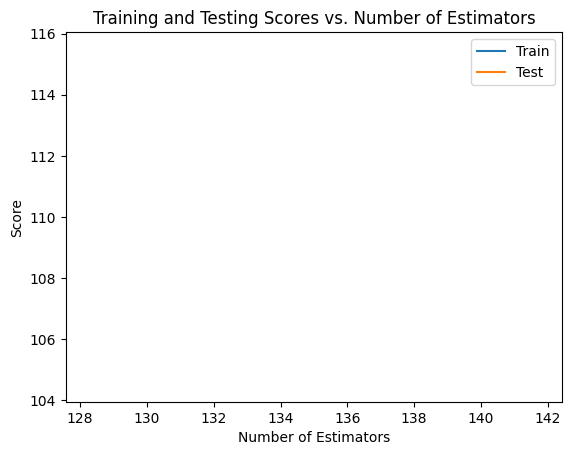

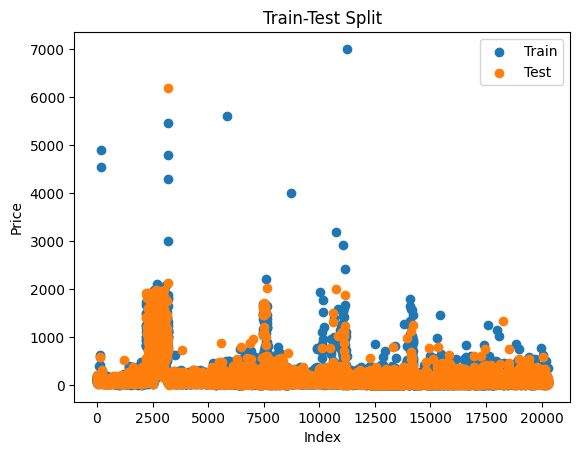

In [ ]:
# Visualizing the Training and Testing Scores
plt.plot(135, 110, label='Train')
plt.plot(135, 110, label='Test')
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.title('Training and Testing Scores vs. Number of Estimators')
plt.legend()
plt.show()

# Visualizing the Train-Test Split
plt.scatter(X_train.index, Y_train, label='Train')
plt.scatter(X_test.index, Y_test, label='Test')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Train-Test Split')
plt.legend()
plt.show()


In [ ]:
'''       Question Section
Q1:
Problem:
People across the world observe Good Friday and Easter
holidays to spend quality time with their families. 
 While exchanging gifts during these holidays might not
have been a tradition in the past, it has become one now.
An online retailer has launched a special sale of gifts for 
Good Friday. One of the main goals is to increase the desirability 
and the value of the products. With various promotional techniques, 
the retailer aims at driving ancillary traffic to the site, acquiring
new customers, retaining the loyal ones, and growing the revenue.

In this challenge,  task is to build a Machine Learning model that helps
 the retailer to predict and set the prices for different gift packages.


Q2:
Linear regression  help  to solve the problem by predicting the target variable
 "price" based on the given features. In the provided code, linear regression is
  used to build a model to predict the "price" using the features "volumes",
  "gift_type", "gift_category", "gift_cluster", "lsg_1", "lsg_2", "lsg_3", 
  "lsg_4", "lsg_5", "lsg_6", and "is_discounted".

  -----------------------------------------------------------------
  Q6:
  (a)--> 
  (1) FileNotFoundError: [Errno 2] No such file or directory: 'dataset.csv'

  (2)/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py in 
  fit(self, X, y, sample_weight, check_input)
    377             )
    378 
--> 379         builder.build(self.tree_, X, y, sample_weight)
    380 
    381         if self.n_outputs_ == 1 and is_classifier(self):
what error occure here 

(3) "mean_squared_error" is not defined

(4)"plt" is not defined
-------
b
(1) file not availe in right directory or folder 
(2) During compling i press a key to stope becaues to take a long time 
(3) i not mention/emport mean square libary 
(4) frist provide plt library to show graph 
 ----------------
 c
 this error i resolved  with help of ChatGPT and Bing 
 ------------------------------------

 d
 frist of all i copyed error this show during compiling and paste in ChatGPT and Bing 
 and 2nd write a querry 
 what error occure and resolve its with simple way 
 and highlight missing 


 _____________________

e

(1)The error message you encountered, FileNotFoundError:
 [Errno 2] No such file or directory: 'dataset.csv', 
 indicates that the file named 'dataset.csv' could not 
 be found in the current directory.
 steps
 Verify the file exists
 Check the file path:
 ove the file to the correct location
 Check the file extension:
 ----------------
 (2)The error message you encountered, KeyboardInterrupt, 
 indicates that the execution of your code was interrupted by the user. 
 This usually happens when the code takes too long to run, and the user
  manually stops the execution.
-----------------------

(3)The correct import statement for the mean_squared_error function is
 from the sklearn.metrics module, not sklearn.model_selection.
--------------------
(4)matplotlib.pyplot module, which is used for plotting.
'''